## Importing libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt 
import seaborn as sns
import warnings 
from  six.moves import urllib
# import sklearn 
warnings.filterwarnings("ignore")

%matplotlib inline 

In [2]:
import os

download_dir="./data/"

download_url="https://raw.githubusercontent.com/aravind-selvam/datasets-for-ML-projects/main/cardekho_dataset.csv"

os.makedirs(download_dir,exist_ok=True)

filename=os.path.basename(download_url)

download_file_path=os.path.join(download_dir,filename)

urllib.request.urlretrieve(download_url,download_file_path)


('./data/cardekho_dataset.csv', <http.client.HTTPMessage at 0x2547faa32b0>)

In [3]:
df=pd.read_csv(download_file_path,index_col=[0])

In [4]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


In [6]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [7]:
num_feat=[x for x in df.columns if df[x].dtype!='O']
cat_feat=[x for x in df.columns if df[x].dtype=='O']

In [8]:
for col in cat_feat:
    print(df[col].value_counts(normalize=True)*100)
    print("-------------------------")

car_name
Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Mercedes-AMG C        0.006489
Tata Altroz           0.006489
Ferrari GTC4Lusso     0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Name: proportion, Length: 121, dtype: float64
-------------------------
brand
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Rover        0.330932
Jeep              0.266044
Kia               0.207644
Porsche           0.136266
Volvo             0.129777
MG                0.123289
Mini 

# Data Preprocessing 

In [9]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


#### Since car_name column is the combination of brand and model we will drop car_name from dataset

In [10]:
df=df.drop('car_name',axis=1)

In [11]:
df.describe(include=object,)

,brand,model,seller_type,fuel_type,transmission_type
count,15411,15411,15411,15411,15411
unique,32,120,3,5,2
top,Maruti,i20,Dealer,Petrol,Manual
freq,4992,906,9539,7643,12225


We could label encode the object values , but the features 'transmission_type', 'fuel_type'and 'seller_type'has categorical values . so it is best for us to get dummies of them and simplify the model . This is bacically one hot encoding and it can be either done using the get_dummies panda function or one hot encoding function in sklearn.

In [12]:
a=['transmission_type','fuel_type','seller_type']
for i in range(len(a)):
    temp=pd.get_dummies(df[a[i]],drop_first=True).astype(int)
    df=df.drop(a[i],axis="columns")
    df=pd.concat([df,temp],axis='columns')
    
    

In [13]:
def frequency_encoding(column):
    freq = column.value_counts(normalize=True)
    encoded_column = column.map(freq)
    return encoded_column

In [14]:
b=['brand','model']
for i in range(len(b)):
    df[b[i]]=frequency_encoding(df[b[i]])
    

## Outlier Detection and capping

In [15]:
def detect_outliers(col):
    # Finding the IQR
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    print('\n ####', col , '####')
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df.loc[(df[col]>upper_limit), col]= upper_limit
    df.loc[(df[col]<lower_limit), col]= lower_limit    
    return df

In [16]:
for i in num_feat:
    detect_outliers(i)


 #### vehicle_age ####
percentile25 4.0
percentile75 8.0
Upper limit 14.0
Lower limit -2.0

 #### km_driven ####
percentile25 30000.0
percentile75 70000.0
Upper limit 130000.0
Lower limit -30000.0

 #### mileage ####
percentile25 17.0
percentile75 22.7
Upper limit 31.25
Lower limit 8.450000000000001

 #### engine ####
percentile25 1197.0
percentile75 1582.0
Upper limit 2159.5
Lower limit 619.5

 #### max_power ####
percentile25 74.0
percentile75 117.3
Upper limit 182.25
Lower limit 9.050000000000011

 #### seats ####
percentile25 5.0
percentile75 5.0
Upper limit 5.0
Lower limit 5.0

 #### selling_price ####
percentile25 385000.0
percentile75 825000.0
Upper limit 1485000.0
Lower limit -275000.0


In [17]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df[num_feat]=ss.fit_transform(df[num_feat])

In [18]:
df


,brand,model,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,Manual,Diesel,Electric,LPG,Petrol,Individual,Trustmark Dealer
0,0.323924,0.050483,1.013137,2.146989,0.001313,-1.618832,-1.497448,0.0,-1.439752,1,0,0,0,1,1,0
1,0.193498,0.037635,-0.344909,-1.080903,-0.191637,-0.600234,-0.469389,0.0,-0.284218,1,0,0,0,1,1,0
2,0.193498,0.058789,1.692160,0.210253,-0.649893,-0.600234,-0.526984,0.0,-1.184460,1,0,0,0,1,1,0
3,0.323924,0.050483,1.013137,-0.532162,0.295562,-1.105722,-0.898467,0.0,-1.154899,1,0,0,0,1,1,0
4,0.051262,0.024268,-0.005397,-0.758114,0.741759,0.164350,0.008355,0.0,-0.230472,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19537,0.193498,0.026604,1.013137,-1.380355,0.027844,-0.882190,-0.871110,0.0,-1.090405,1,0,0,0,1,0,0
19540,0.323924,0.022257,-1.363443,-1.145461,-0.529299,-0.153168,-0.207335,0.0,0.723516,1,0,0,0,1,0,0
19541,0.021673,0.011810,-0.005397,0.436206,0.348623,0.164350,0.150325,0.0,-0.620129,1,1,0,0,0,0,0
19542,0.065602,0.021413,-0.344909,2.469778,-0.891080,1.844656,1.200846,0.0,1.529703,1,1,0,0,0,0,0


#### Feature importance

In [19]:
y=df['selling_price']
X=df.drop('selling_price',axis=1)

In [20]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [21]:
print(model.feature_importances_)

[1.51158056e-02 2.47458275e-02 1.98340659e-01 3.53549425e-02
 1.69175949e-02 1.78601335e-01 4.22800244e-01 0.00000000e+00
 8.01767653e-02 1.61404781e-02 9.66639598e-07 1.02923027e-05
 6.30570525e-03 5.30408518e-03 1.85298240e-04]


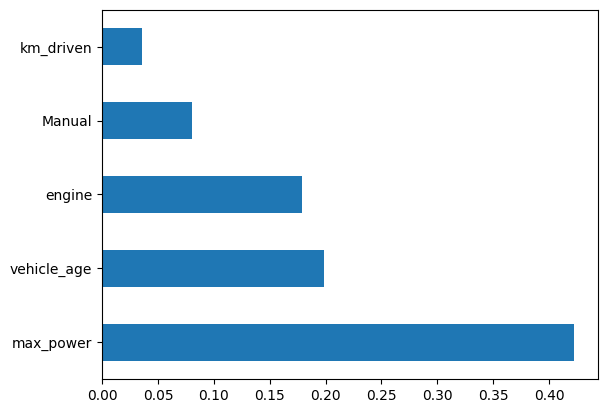

In [22]:
#plot important features
feat_imps=pd.Series(model.feature_importances_,index=X.columns)
feat_imps.nlargest(5).plot(kind='barh')
plt.show()

## Variance Inflation Factor 
It is used to detect multicollienearity in the data .


In [23]:
import statsmodels.api as sm 
for i in range(len(num_feat)):
    x=df[num_feat[i]]
    y=df['selling_price']
    model=sm.OLS(x,y)
    results=model.fit()
    req=results.rsquared
    vif = round(1 / (1 - req), 2)
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
            num_feat[i], vif)
        )
    

Variance Inflation Factor of vehicle_age column is 1.19 

Variance Inflation Factor of km_driven column is 1.02 

Variance Inflation Factor of mileage column is 1.15 

Variance Inflation Factor of engine column is 1.92 

Variance Inflation Factor of max_power column is 2.85 

Variance Inflation Factor of seats column is nan 

Variance Inflation Factor of selling_price column is inf 



# Train Test split
Now that we have the features converted into numericals, we know the important features. We will split the data and start fitting it to various algorithms

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=7)


## Model Selection

###### Here We are using four regression algorithms .DecisionTrees and ensemble techniques like RandomForest,Adaboost,Xgboost and Catboost. 

In [28]:
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
from xgboost import XGBRegressor 
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [29]:
def metric_calc(true,predicted):
    mae= mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    r2s=r2_score(true,predicted)
    return mae,rmse, r2s
    

In [30]:
#Initialize few parameter for Hyperparamter tuning
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

cat_params = {"learning_rate": [0.1, 0.01, 0.06, 0.05],
              "max_depth": [6, 8, 12, 20, 30]}

In [31]:
randomcv_models=[('random forest',RandomForestRegressor(),rf_params),
                ('Xgboost',XGBRegressor(),xgboost_params),
                 ('catboost',CatBoostRegressor(),cat_params)]


1)When verbose mode is enabled, the program or algorithm provides more detailed information about its progress, intermediate results, and other relevant information. This can be helpful for understanding the inner workings of the algorithm, diagnosing issues, or monitoring the program's execution.


2)Setting n_jobs to -1 is a common practice that instructs the library to utilize all available CPU cores for parallel execution.


3)n_jobs is often used to specify the number of parallel jobs or processes to be used for a particular operation. Setting n_jobs to -1 is a common practice that instructs the library to utilize all available CPU cores for parallel execution.

In [33]:
best_parameters={}
for n,m,p in randomcv_models:
    random=RandomizedSearchCV(estimator=m,param_distributions=p, n_iter=100,cv=3,
                             verbose=1,n_jobs=-1)
    random.fit(X_train,y_train)
    best_parameters[n]=random.best_params_
    
for i in best_parameters:
    print(f"---------------- Best paramaeters for {i}--------------------")
    print(best_parameters[i])
    

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
0:	learn: 0.9621721	total: 170ms	remaining: 2m 49s
1:	learn: 0.9233001	total: 182ms	remaining: 1m 30s
2:	learn: 0.8886248	total: 191ms	remaining: 1m 3s
3:	learn: 0.8544625	total: 200ms	remaining: 49.7s
4:	learn: 0.8229340	total: 204ms	remaining: 40.5s
5:	learn: 0.7920212	total: 207ms	remaining: 34.3s
6:	learn: 0.7637040	total: 211ms	remaining: 29.9s
7:	learn: 0.7376710	total: 215ms	remaining: 26.7s
8:	learn: 0.7121888	total: 219ms	remaining: 24.1s
9:	learn: 0.6887824	total: 223ms	remaining: 22s
10:	learn: 0.6657029	total: 226ms	remaining: 20.3s
11:	learn: 0.6440924	total: 230ms	remaining: 19s
12:	learn: 0.6239017	total: 234ms	remaining: 17.7s
13:	learn: 0.6051644	total: 237ms	remaining: 16.7s
14:	learn: 0.5876989	total: 241ms	remaining: 15.9s
15:	learn: 0.5709926	total: 246ms	remaining: 15.2s
16:	learn

193:	learn: 0.2484322	total: 982ms	remaining: 4.08s
194:	learn: 0.2482410	total: 986ms	remaining: 4.07s
195:	learn: 0.2481061	total: 989ms	remaining: 4.06s
196:	learn: 0.2479671	total: 993ms	remaining: 4.05s
197:	learn: 0.2477776	total: 997ms	remaining: 4.04s
198:	learn: 0.2475995	total: 1s	remaining: 4.03s
199:	learn: 0.2474640	total: 1s	remaining: 4.01s
200:	learn: 0.2471853	total: 1.01s	remaining: 4s
201:	learn: 0.2470526	total: 1.01s	remaining: 3.99s
202:	learn: 0.2469199	total: 1.01s	remaining: 3.98s
203:	learn: 0.2467971	total: 1.02s	remaining: 3.97s
204:	learn: 0.2466438	total: 1.02s	remaining: 3.96s
205:	learn: 0.2465155	total: 1.03s	remaining: 3.96s
206:	learn: 0.2463943	total: 1.03s	remaining: 3.94s
207:	learn: 0.2463119	total: 1.03s	remaining: 3.93s
208:	learn: 0.2461454	total: 1.04s	remaining: 3.92s
209:	learn: 0.2459649	total: 1.04s	remaining: 3.92s
210:	learn: 0.2458679	total: 1.04s	remaining: 3.9s
211:	learn: 0.2456222	total: 1.05s	remaining: 3.9s
212:	learn: 0.2454950	t

399:	learn: 0.2277884	total: 1.78s	remaining: 2.67s
400:	learn: 0.2277462	total: 1.79s	remaining: 2.67s
401:	learn: 0.2276652	total: 1.79s	remaining: 2.67s
402:	learn: 0.2276006	total: 1.79s	remaining: 2.66s
403:	learn: 0.2275155	total: 1.8s	remaining: 2.65s
404:	learn: 0.2274686	total: 1.8s	remaining: 2.65s
405:	learn: 0.2273574	total: 1.81s	remaining: 2.65s
406:	learn: 0.2272673	total: 1.81s	remaining: 2.64s
407:	learn: 0.2272394	total: 1.81s	remaining: 2.63s
408:	learn: 0.2272038	total: 1.82s	remaining: 2.63s
409:	learn: 0.2271610	total: 1.82s	remaining: 2.62s
410:	learn: 0.2270523	total: 1.83s	remaining: 2.62s
411:	learn: 0.2270167	total: 1.83s	remaining: 2.61s
412:	learn: 0.2269544	total: 1.83s	remaining: 2.61s
413:	learn: 0.2268754	total: 1.84s	remaining: 2.6s
414:	learn: 0.2267701	total: 1.84s	remaining: 2.6s
415:	learn: 0.2266963	total: 1.85s	remaining: 2.59s
416:	learn: 0.2266564	total: 1.85s	remaining: 2.59s
417:	learn: 0.2265936	total: 1.85s	remaining: 2.58s
418:	learn: 0.22

600:	learn: 0.2168129	total: 2.54s	remaining: 1.69s
601:	learn: 0.2167604	total: 2.55s	remaining: 1.68s
602:	learn: 0.2167170	total: 2.55s	remaining: 1.68s
603:	learn: 0.2166773	total: 2.55s	remaining: 1.67s
604:	learn: 0.2166473	total: 2.56s	remaining: 1.67s
605:	learn: 0.2166107	total: 2.56s	remaining: 1.67s
606:	learn: 0.2165744	total: 2.56s	remaining: 1.66s
607:	learn: 0.2165263	total: 2.57s	remaining: 1.66s
608:	learn: 0.2164970	total: 2.57s	remaining: 1.65s
609:	learn: 0.2164514	total: 2.58s	remaining: 1.65s
610:	learn: 0.2164134	total: 2.58s	remaining: 1.64s
611:	learn: 0.2163890	total: 2.58s	remaining: 1.64s
612:	learn: 0.2163650	total: 2.59s	remaining: 1.63s
613:	learn: 0.2163273	total: 2.59s	remaining: 1.63s
614:	learn: 0.2162793	total: 2.59s	remaining: 1.62s
615:	learn: 0.2162218	total: 2.6s	remaining: 1.62s
616:	learn: 0.2162065	total: 2.6s	remaining: 1.61s
617:	learn: 0.2161884	total: 2.6s	remaining: 1.61s
618:	learn: 0.2161544	total: 2.61s	remaining: 1.6s
619:	learn: 0.21

759:	learn: 0.2109742	total: 3.15s	remaining: 994ms
760:	learn: 0.2109389	total: 3.15s	remaining: 989ms
761:	learn: 0.2109013	total: 3.15s	remaining: 985ms
762:	learn: 0.2108572	total: 3.16s	remaining: 981ms
763:	learn: 0.2108003	total: 3.16s	remaining: 977ms
764:	learn: 0.2107787	total: 3.17s	remaining: 972ms
765:	learn: 0.2107474	total: 3.17s	remaining: 968ms
766:	learn: 0.2107262	total: 3.17s	remaining: 964ms
767:	learn: 0.2106768	total: 3.18s	remaining: 960ms
768:	learn: 0.2106351	total: 3.18s	remaining: 956ms
769:	learn: 0.2106091	total: 3.19s	remaining: 952ms
770:	learn: 0.2105853	total: 3.19s	remaining: 947ms
771:	learn: 0.2105827	total: 3.19s	remaining: 943ms
772:	learn: 0.2105497	total: 3.2s	remaining: 939ms
773:	learn: 0.2105362	total: 3.2s	remaining: 935ms
774:	learn: 0.2105256	total: 3.2s	remaining: 930ms
775:	learn: 0.2104931	total: 3.21s	remaining: 926ms
776:	learn: 0.2104742	total: 3.21s	remaining: 922ms
777:	learn: 0.2104218	total: 3.22s	remaining: 918ms
778:	learn: 0.2

969:	learn: 0.2045132	total: 3.94s	remaining: 122ms
970:	learn: 0.2044847	total: 3.95s	remaining: 118ms
971:	learn: 0.2044471	total: 3.95s	remaining: 114ms
972:	learn: 0.2044073	total: 3.95s	remaining: 110ms
973:	learn: 0.2043714	total: 3.96s	remaining: 106ms
974:	learn: 0.2043491	total: 3.96s	remaining: 102ms
975:	learn: 0.2043032	total: 3.96s	remaining: 97.5ms
976:	learn: 0.2042838	total: 3.97s	remaining: 93.4ms
977:	learn: 0.2042610	total: 3.97s	remaining: 89.3ms
978:	learn: 0.2042389	total: 3.98s	remaining: 85.3ms
979:	learn: 0.2042255	total: 3.98s	remaining: 81.2ms
980:	learn: 0.2042093	total: 3.98s	remaining: 77.1ms
981:	learn: 0.2041698	total: 3.99s	remaining: 73.1ms
982:	learn: 0.2041464	total: 3.99s	remaining: 69ms
983:	learn: 0.2041284	total: 3.99s	remaining: 64.9ms
984:	learn: 0.2041073	total: 4s	remaining: 60.9ms
985:	learn: 0.2040822	total: 4s	remaining: 56.8ms
986:	learn: 0.2040523	total: 4s	remaining: 52.7ms
987:	learn: 0.2040195	total: 4.01s	remaining: 48.7ms
988:	learn

In [58]:
modd={
    'random_forest':RandomForestRegressor(**best_parameters['random forest'],n_jobs=-1),
    #The double asterisks ** in Python is known as the "double asterisk unpacking" operator.
    #It is used to unpack a dictionary and pass its key-value pairs as keyword arguments to a function or constructor.
    'XgBoost':XGBRegressor(**best_parameters['Xgboost'],n_jobs=-1),
    'CatBoost':CatBoostRegressor(**best_parameters['catboost'],verbose=False)
}
model_list = []
r2_list =[]
for i,j in modd.items():
    Fmodel=j
    Fmodel.fit(X_train,y_train)
    y_train_pred=Fmodel.predict(X_train)
    y_test_pred=Fmodel.predict(X_test)
    
    model_train_mae , model_train_rmse, model_train_r2 = metric_calc(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = metric_calc(y_test, y_test_pred)
    
    model_list.append(i)
    r2_list.append(model_test_r2)
    
    

In [59]:
pd.DataFrame(list(zip(model_list, r2_list*100)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
2,CatBoost,0.941256
0,random_forest,0.940342
1,XgBoost,0.939559


# CatBoost has the higest Rsquared score , the highest accuracy .